In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
df = pd.read_csv("insurance_data.csv")
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
# Copy dataset
insurance_df = df.copy()

# Info
insurance_df.info()

# Summary
insurance_df.describe()

# Missing values
insurance_df.isnull().sum()

# Duplicates
insurance_df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


np.int64(0)

In [ ]:
# Drop irrelevant columns
insurance_df.drop(columns=['index','PatientID'], inplace=True, errors='ignore')

# Drop missing values
insurance_df = insurance_df.dropna().reset_index(drop=True)

# Fix datatype
insurance_df['age'] = insurance_df['age'].astype(int)

# Remove outliers
insurance_df = insurance_df[insurance_df['bmi'] <= 50]
insurance_df = insurance_df[insurance_df['bloodpressure'] <= 135]

insurance_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1313 entries, 0 to 1331
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1313 non-null   int64  
 1   gender         1313 non-null   object 
 2   bmi            1313 non-null   float64
 3   bloodpressure  1313 non-null   int64  
 4   diabetic       1313 non-null   object 
 5   children       1313 non-null   int64  
 6   smoker         1313 non-null   object 
 7   region         1313 non-null   object 
 8   claim          1313 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 102.6+ KB


# 4. Univariate Analysis
We analyze individual columns:
- Age, BMI, Blood Pressure, Claim (numeric distributions)
- Gender, Region, Smoker, Diabetic (categorical distributions)

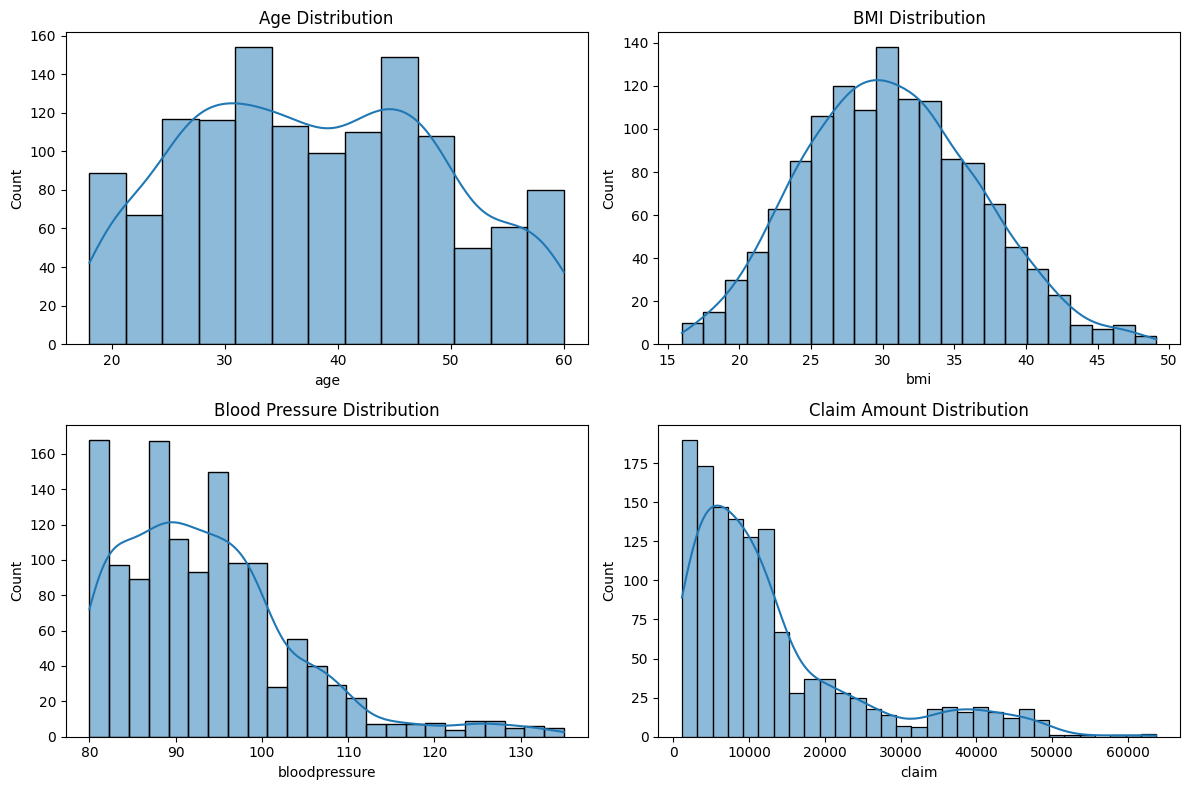

In [ ]:
# Numerical Distributions
fig, ax = plt.subplots(2,2,figsize=(12,8))
sns.histplot(insurance_df['age'], kde=True, ax=ax[0,0]).set(title="Age Distribution")
sns.histplot(insurance_df['bmi'], kde=True, ax=ax[0,1]).set(title="BMI Distribution")
sns.histplot(insurance_df['bloodpressure'], kde=True, ax=ax[1,0]).set(title="Blood Pressure Distribution")
sns.histplot(insurance_df['claim'], kde=True, ax=ax[1,1]).set(title="Claim Amount Distribution")
plt.tight_layout()
plt.show()

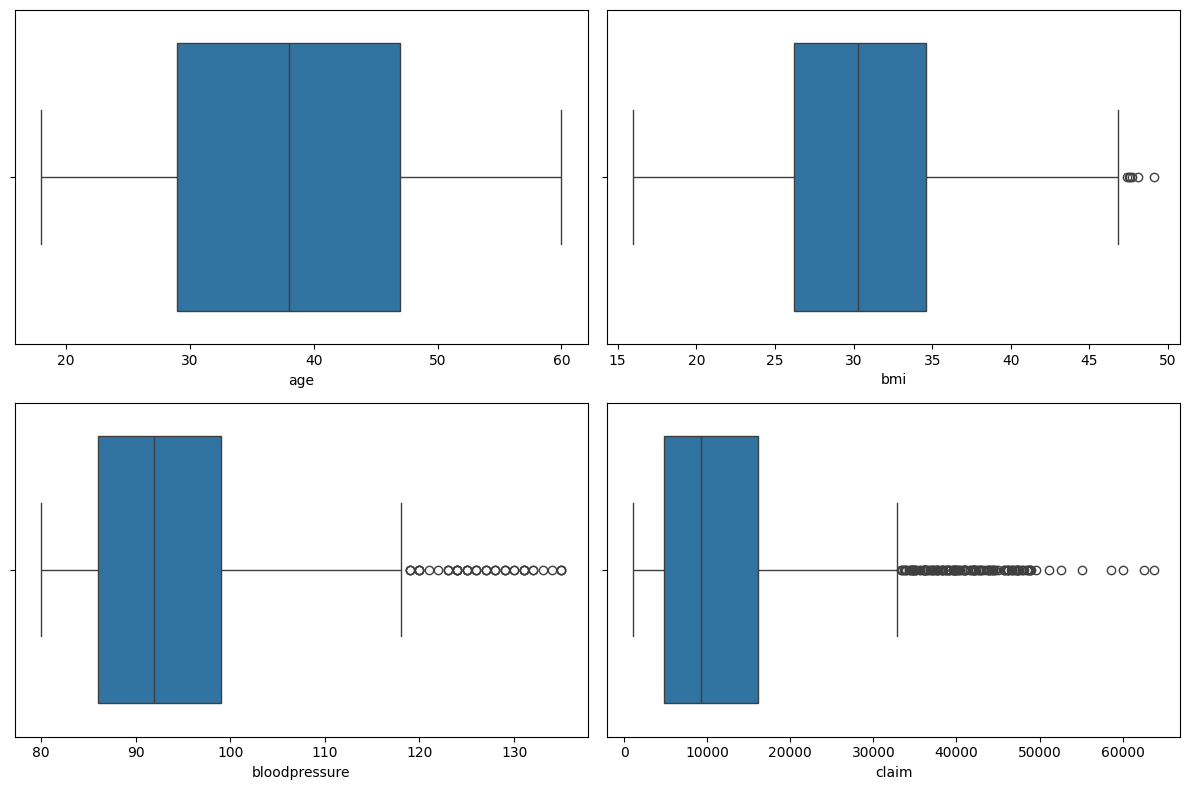

In [ ]:
# Boxplots
fig, ax = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x=insurance_df['age'], ax=ax[0,0])
sns.boxplot(x=insurance_df['bmi'], ax=ax[0,1])
sns.boxplot(x=insurance_df['bloodpressure'], ax=ax[1,0])
sns.boxplot(x=insurance_df['claim'], ax=ax[1,1])
plt.tight_layout()
plt.show()

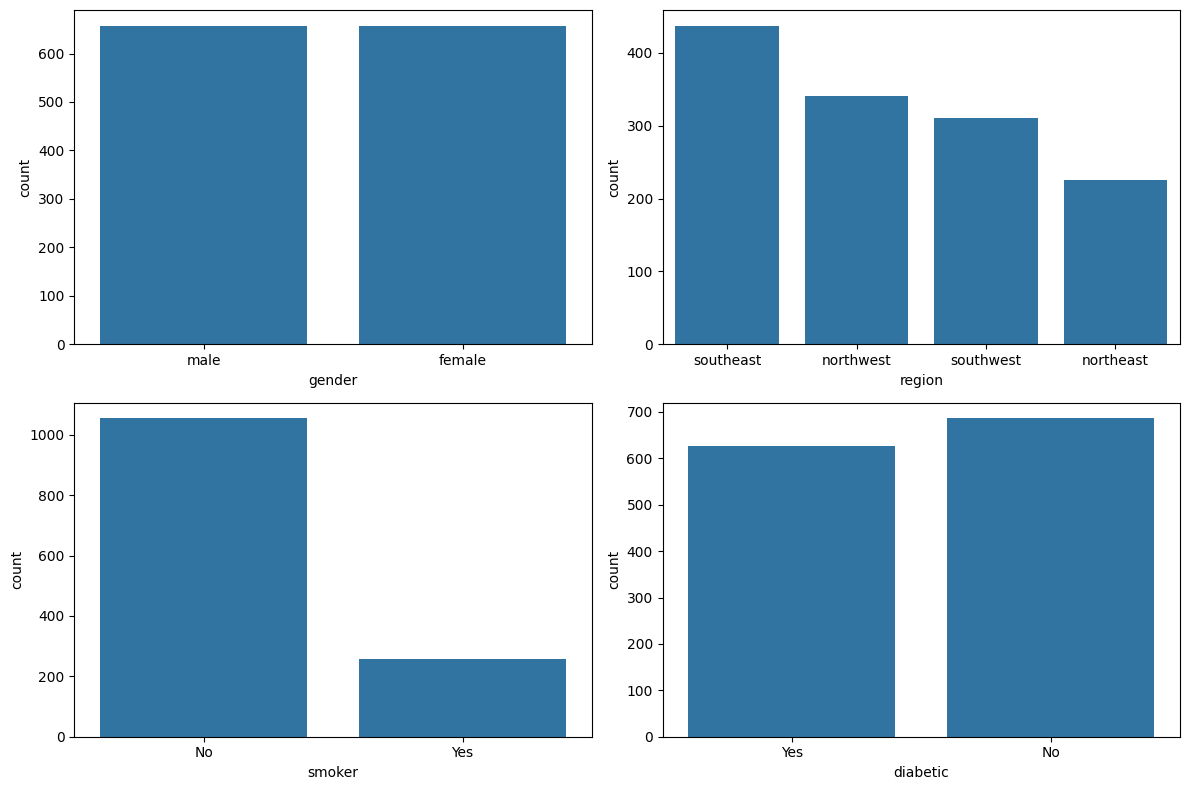

In [ ]:
# Categorical Distributions
fig, ax = plt.subplots(2,2,figsize=(12,8))
sns.countplot(x='gender', data=insurance_df, ax=ax[0,0])
sns.countplot(x='region', data=insurance_df, ax=ax[0,1])
sns.countplot(x='smoker', data=insurance_df, ax=ax[1,0])
sns.countplot(x='diabetic', data=insurance_df, ax=ax[1,1])
plt.tight_layout()
plt.show()

##Univariate Analysis Result:-

1. Age
- Age is normally (almost) distributed
- Maximum number of people are aged between 25 - 50
- There are less number of people aged between 38 - 40

2.BMI
- If your BMI is less than 18.5, it falls within the underweight range. If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range. If your BMI is 25.0 to 29.9, it falls within the overweight range. If your BMI is 30.0 or higher, it falls within the obese range
- The BMI is normally distributed
- The BMI has very high values, values reaching over 45
- Median is at 30, which is considered as obese

3.Blood Pressure
- Right skewed(+ve)

4.Claim
- RIght Skewed(+ve)

# 5. Bivariate Analysis
We compare the target variable **claim** with categorical features.

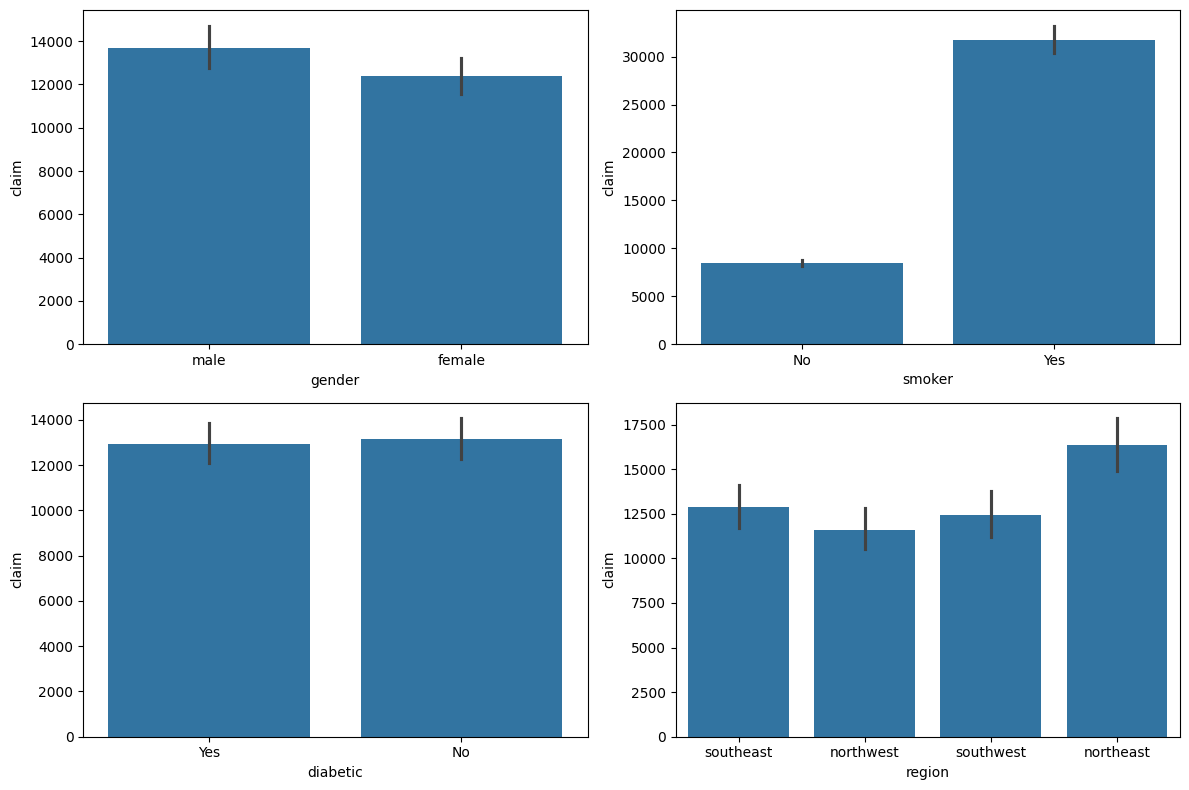

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12,8))

sns.barplot(data=insurance_df, x='gender', y='claim', ax=ax[0,0])
sns.barplot(data=insurance_df, x='smoker', y='claim', ax=ax[0,1])
sns.barplot(data=insurance_df, x='diabetic', y='claim', ax=ax[1,0])
sns.barplot(data=insurance_df, x='region', y='claim', ax=ax[1,1])

plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(df['gender'],df['region'],normalize='index')*100

region,northeast,northwest,southeast,southwest
gender,,,,
female,16.918429,24.773414,33.836858,24.471299
male,17.629630,27.407407,32.444444,22.518519


In [ ]:
pd.crosstab(df['diabetic'],df['region'],normalize='index')*100

region,northeast,northwest,southeast,southwest
diabetic,,,,
No,15.781923,27.546628,32.281205,24.390244
Yes,18.906250,24.531250,34.062500,22.500000


In [ ]:
pd.crosstab(df['smoker'],df['region'],normalize='index')*100

region,northeast,northwest,southeast,southwest
smoker,,,,
No,15.428034,27.375353,33.113829,24.082785
Yes,24.452555,21.167883,33.211679,21.167883


## Bivariate Analysis Result:-

1. Men have more claims than women

2. Non - Diabetic people have more claims than diabetic people

3. Smokers have more claim than non smokers

4. NorthEast has the most number of claims

# 6. Multivariate Analysis
We check how multiple features together influence claim amount.

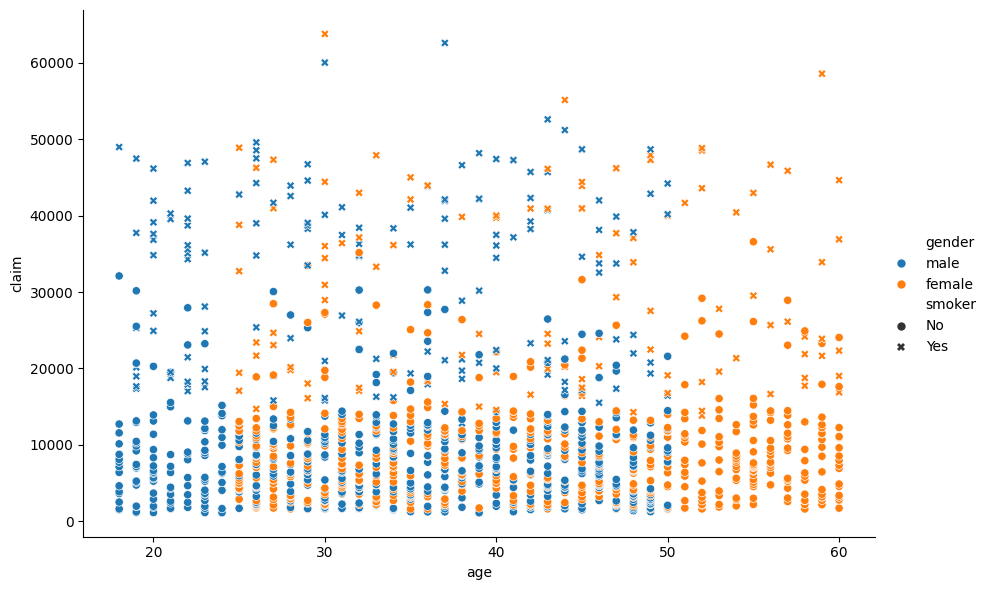

In [ ]:
# Age vs Claim with Gender & Smoker
sns.relplot(data=insurance_df, x='age', y='claim', hue='gender', style='smoker', height=6, aspect=1.5)

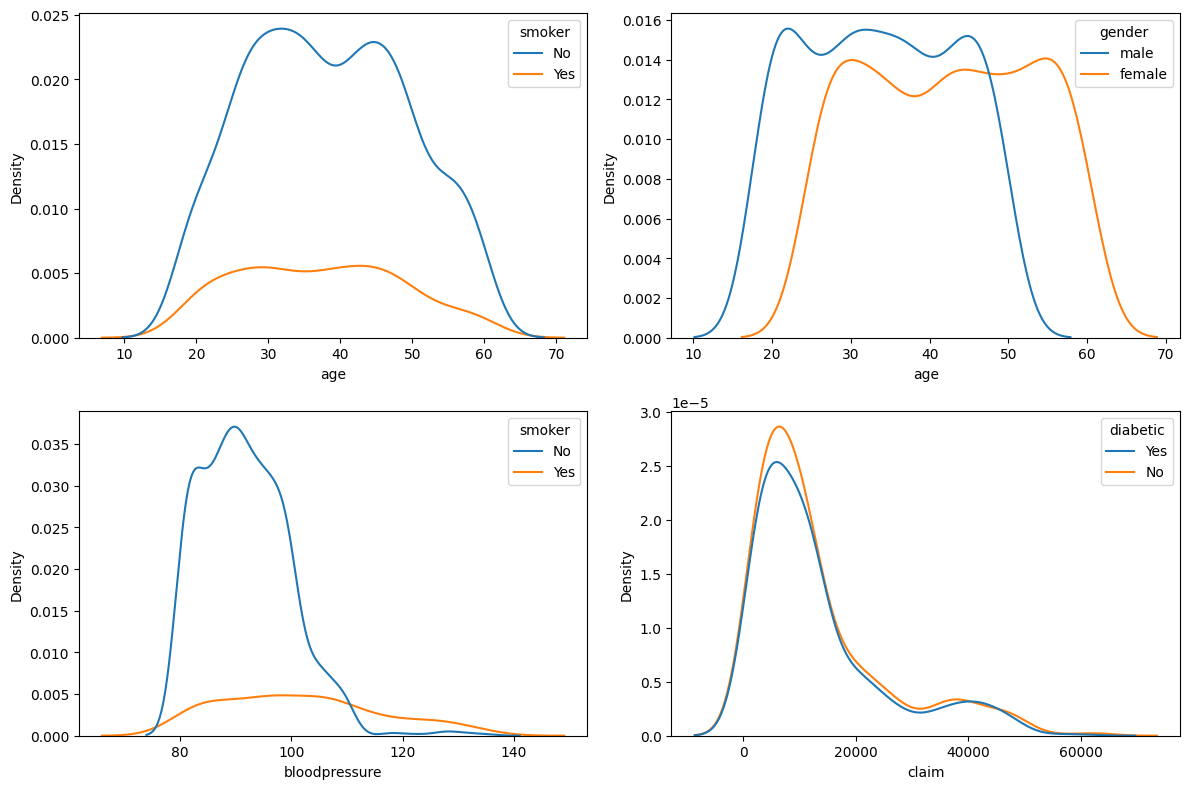

In [ ]:
# KDE plots
fig, ax = plt.subplots(2,2,figsize=(12,8))
sns.kdeplot(data=insurance_df, x='age', hue='smoker', ax=ax[0,0])
sns.kdeplot(data=insurance_df, x='age', hue='gender', ax=ax[0,1])
sns.kdeplot(data=insurance_df, x='bloodpressure', hue='smoker', ax=ax[1,0])
sns.kdeplot(data=insurance_df, x='claim', hue='diabetic', ax=ax[1,1])
plt.tight_layout()
plt.show()

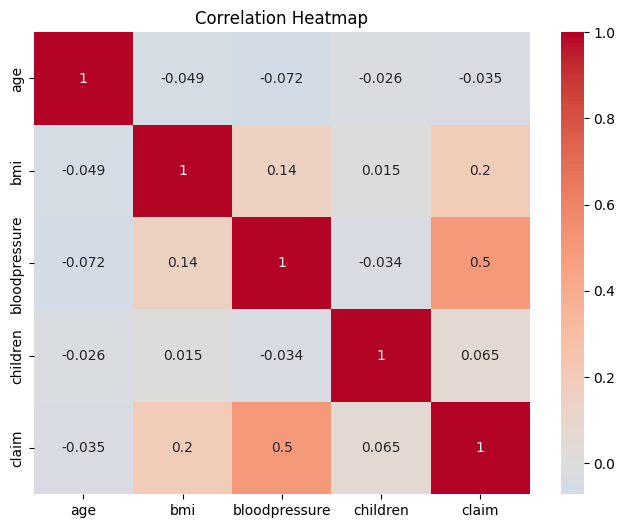

In [ ]:
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(insurance_df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()